In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
Vth = 0
VGS = np.linspace(30,2,1000)
VDS = np.linspace(0,20,100)

IDS = np.zeros([len(VGS), len(VDS)])

alpha = 1

for i in range(len(VGS)):
    temp_IDS =(VGS[i] - Vth - VDS/2)*VDS
    IDS[i,:] = temp_IDS
    inds = np.where(temp_IDS == max(temp_IDS))[0][0]
    IDS[i,inds:]=max(temp_IDS) + alpha*(VDS[inds:] - VDS[inds])/VGS[i]


In [9]:
Vth = 0
VGS = np.linspace(0,1,5)
VDS = np.linspace(0,20,100)

IDS = np.zeros([len(VGS), len(VDS)])

alpha = 1
i0 = 1e-9
for i in range(len(VGS)):
    temp_IDS =((VGS[i] - Vth - VDS/2)*VDS) + i0
    IDS[i,:] = temp_IDS
    inds = np.where(temp_IDS == max(temp_IDS))[0][0]
    IDS[i,inds:]=max(temp_IDS) 

plt.figure()
for i in range(len(VGS)):
    plt.plot(VDS, IDS[i,:]/i0, label=f'VGS = {VGS[i]}')
plt.legend()
plt.xlabel('VDS (V)')
plt.ylabel('IDS (A)')
plt.show()

plt.figure()

plt.plot(VDS, IDS[0,:]/i0, label=f'VGS = {VGS[0]}')
plt.legend()
plt.xlabel('VDS (V)')
plt.ylabel('IDS (A)')
plt.show()


(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64),)


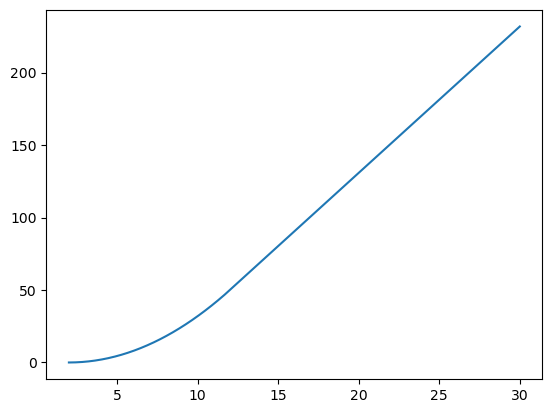

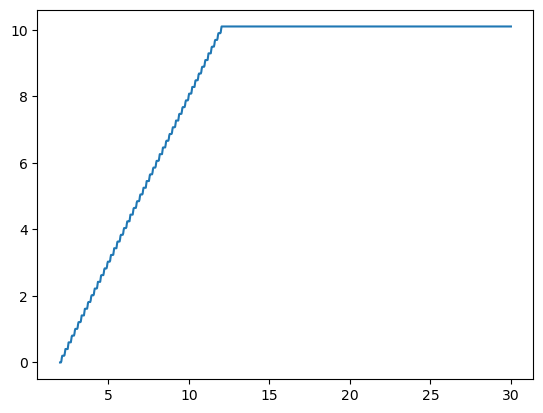

In [2]:
print(np.where(VDS>10))
to_plot = IDS[:,50]
plt.figure()
plt.plot(VGS,to_plot)
plt.show()
plt.figure()
plt.plot(VGS, np.gradient(to_plot,VGS))

In [46]:
Rc = 0

def alpha_theory(mu,Cox_surf,W,L):
    return (mu*Cox_surf*W / L)


Vth = 5
VGS = np.linspace(100,-1,int(1e3))
VSc = np.linspace(0,10,int(1e3))

IDS = np.zeros([len(VGS), len(VSc)])
VDS = np.zeros([len(VGS), len(VSc)])
Rch = np.zeros([len(VGS), 1])

alpha = alpha_theory(0.1,11.5e-9,5e-6,5e-6)
print(alpha)
for i in range(len(VGS)):
    temp_IDS =alpha * (VGS[i] - Vth - VSc/2)*VSc
    IDS[i,:] = temp_IDS
    inds = np.where(temp_IDS == max(temp_IDS))[0][0]
    IDS[i,inds:]=max(temp_IDS)
    Rch = alpha * (VGS[i] - Vth)
    VDS[i,:] = VSc + 2*Rc*IDS[i,:]

plt.figure()
my_inds = np.linspace(0,1000-1,10).astype(int)
for i in range(len(my_inds)):
    plt.plot(VDS[my_inds[i],:], IDS[my_inds[i],:],'o--',label=f'VGS = {VGS[my_inds[i]]}')
plt.legend()
plt.xlabel('VDS (V)')
plt.ylabel('IDS (A)')
plt.show()


1.1500000000000002e-09


In [13]:

wanted_VDS = 10
inds = np.argmin(abs(VDS-wanted_VDS), axis = 1)
IDS_to_plot = 0*VGS
VSc_for_VDS = 0*VGS
for i in range(len(IDS_to_plot)):
    IDS_to_plot[i] = IDS[i,inds[i]]
    VSc_for_VDS[i] = VSc[inds[i]]
to_plot = IDS_to_plot
plt.figure()
plt.plot(VGS,to_plot)
plt.show()
plt.figure()
plt.plot(VGS,VSc_for_VDS)
plt.show()


In [39]:

def my_fit(VGS,Rc,Vth,alpha,wanted_VDS):
    VSc = np.linspace(0,20,5000)
    IDS = np.zeros([len(VGS), len(VSc)])
    VDS = np.zeros([len(VGS), len(VSc)])

    for i in range(len(VGS)):
        temp_IDS =alpha * (VGS[i] - Vth - VSc/2)*VSc
        IDS[i,:] = temp_IDS
        inds = np.where(temp_IDS == max(temp_IDS))[0][0]
        IDS[i,inds:]=max(temp_IDS)
        VDS[i,:] = VSc + 2*Rc*IDS[i,:]

    inds = np.argmin(abs(VDS-wanted_VDS), axis = 1)
    IDS_to_plot = 0*VGS
    VSc_for_VDS = 0*VGS
    for i in range(len(IDS_to_plot)):
        IDS_to_plot[i] = IDS[i,inds[i]]
        VSc_for_VDS[i] = VSc[inds[i]]

    return IDS_to_plot
my_VGS = np.linspace(-5,20,10000)
plt.figure()
plt.plot(my_VGS,my_fit(my_VGS,1e1,-1,1e-6,0.5), label = '$R_c$ = 10 $\Omega$')
plt.plot(my_VGS,my_fit(my_VGS,1e7,-1,1e-6,0.5), label = '$R_c$ = 10 $M\Omega$')
plt.xlabel('$V_{GS}$ (V)')
plt.ylabel('$I_{DS}$ (V)')
plt.legend()
plt.show()
